In [3]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# hosp = pd.read_csv("Hospitalization_all_locs.csv")
# stats = pd.read_csv("summary_stats_all_locs.csv")
# summary = pd.read_csv("../metadata.csv")
hospital = pd.read_csv("../hospInfo.csv")
countries = pd.read_csv("../covid-19/data/countries-aggregated.csv")
us_confirmed = pd.read_csv("../covid-19/data/us_confirmed.csv")

In [5]:
df = us_confirmed[us_confirmed['Province/State'] == 'Washington']  # for a smaller trial dataset
# df = us_confirmed
county_list = df['Combined_Key'].unique()

In [6]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
316506,84053001,US,USA,840,53001.0,Adams,46.982998,"Adams, Washington, US",2020-01-22,0,-118.560173,US,Washington
316507,84053001,US,USA,840,53001.0,Adams,46.982998,"Adams, Washington, US",2020-01-23,0,-118.560173,US,Washington
316508,84053001,US,USA,840,53001.0,Adams,46.982998,"Adams, Washington, US",2020-01-24,0,-118.560173,US,Washington
316509,84053001,US,USA,840,53001.0,Adams,46.982998,"Adams, Washington, US",2020-01-25,0,-118.560173,US,Washington
316510,84053001,US,USA,840,53001.0,Adams,46.982998,"Adams, Washington, US",2020-01-26,0,-118.560173,US,Washington


In [81]:
# county_list = us_confirmed.groupby('Combined_Key')['Date'].count()

In [7]:
def get_country_growth_df(df, county_list):
    df_map = {}
    for i in county_list:
        temp = df[df['Combined_Key'] == i].reset_index()
        temp = temp.sort_values('Date', ascending=[1])
        temp['Case_growth'] = temp['Case'].pct_change()
        df_map[i] = temp
    return df_map

In [8]:
def growth_of_county(df_map):
    df_growth = {}
    for i in df_map.keys():
        temp = df_map[i]
        df_growth[i] = temp['Case_growth']#.to_frame().rename(columns={"Case_growth": i})
    return df_growth

In [9]:
start = datetime.now()

df_map = get_country_growth_df(df, county_list)
df_growth = growth_of_county(df_map)

print(datetime.now() - start)
print(len(county_list), len(df_map), len(df_growth))

0:00:00.222665
41 41 41


In [14]:
def pad_zeros(array1, array2):  
    
    dif = len(array1) - len(array2)
#     if max(len(array1), len(array2)) > 0 and abs(dif)/max(len(array1), len(array2)) > 0.5:
#         return np.zeros(len(array1)), np.zeros(len(array2))
    
    if dif > 0:
        array2 = np.array(np.pad(array2, (0, abs(dif)), 'constant', constant_values=(0))).reshape(1, -1)
        array1 = np.array(array1).reshape(1, -1)
    else:
        array1 = np.array(np.pad(array1, (0, abs(dif)), 'constant', constant_values=(0))).reshape(1, -1)
        array2 = np.array(array2).reshape(1, -1)
    
    return array1, array2

In [15]:
def calculate_coef(k1, k2, v1, v2):
    X = v1.replace([np.inf, -np.inf], np.nan).dropna()
    y = v2.replace([np.inf, -np.inf], np.nan).dropna()
#     X, y = pad_zeros(X, y)
    if np.sum(y) == 0:
        return None
    reg = LinearRegression().fit(X, y)
    score = reg.score(X, y) 
    if score > 0.7:
        return (k1, k2, score)  

In [16]:
coef_list = []
for k1, v1 in df_growth.items():
    for k2, v2 in df_growth.items():
        if k1 == k2: 
            continue
        result = calculate_coef(k1,k2,v1,v2)
        if result != None:
            coef_list.append(result)

In [17]:
len(coef_list)

0

In [398]:
# X = df_growth['Adams, Washington, US'].replace([np.inf, -np.inf], np.nan).dropna()
# y = df_growth['Wahkiakum, Washington, US'].replace([np.inf, -np.inf], np.nan).dropna()
# y = np.array(np.pad(y, (0, 11), 'constant', constant_values=(0))).reshape(-1,1)
# X = np.array(X).reshape(-1,1)
# # y.shape
# # X.shape
# reg = LinearRegression().fit(X, y)
# score = reg.score(X, y) 
# score

0.7255135649535143

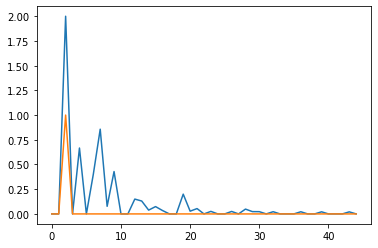

In [399]:
plt.plot(X)
plt.plot(y)

* Code ends here

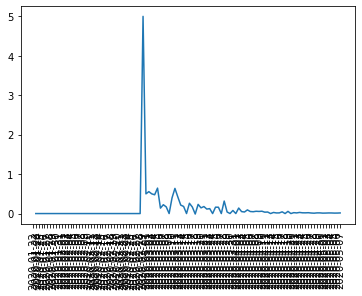

In [140]:
df = df_map['King, Washington, US']
plt.plot(df['Date'], df['Case_growth'])
plt.xticks(rotation=90)
plt.show()

In [391]:
WA = df_map['Wahkiakum, Washington, US']
# WA[WA['Date'] == '2020-01-22']
WA

,index,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State,Case_growth
0,320144,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-01-22,0,-123.425083,US,Washington,NaN
1,320145,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-01-23,0,-123.425083,US,Washington,NaN
2,320146,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-01-24,0,-123.425083,US,Washington,NaN
3,320147,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-01-25,0,-123.425083,US,Washington,NaN
4,320148,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-01-26,0,-123.425083,US,Washington,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,320246,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-05-03,2,-123.425083,US,Washington,0.0
103,320247,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-05-04,2,-123.425083,US,Washington,0.0
104,320248,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-05-05,2,-123.425083,US,Washington,0.0
105,320249,84053069,US,USA,840,53069.0,Wahkiakum,46.2918,"Wahkiakum, Washington, US",2020-05-06,2,-123.425083,US,Washington,0.0


In [126]:
df_map['Westchester, New York, US']['Date'].max()

'2020-05-07'

In [124]:
us_confirmed[us_confirmed['Province/State'] == "New York"].groupby('Combined_Key')['Case'].sum()

Combined_Key
Albany, New York, US          28945
Allegany, New York, US         1076
Bronx, New York, US               0
Broome, New York, US           7324
Cattaraugus, New York, US      1235
                              ...  
Washington, New York, US       3080
Wayne, New York, US            2044
Westchester, New York, US    904741
Wyoming, New York, US          1693
Yates, New York, US             349
Name: Case, Length: 64, dtype: int64

In [78]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-22,0,-170.132,US,American Samoa
1,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-23,0,-170.132,US,American Samoa
2,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-24,0,-170.132,US,American Samoa
3,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-25,0,-170.132,US,American Samoa
4,16,AS,ASM,16,60.0,NaN,-14.271,"American Samoa, US",2020-01-26,0,-170.132,US,American Samoa


In [13]:
stats.describe()

,all_bed_capacity,icu_bed_capacity,all_bed_usage,icu_bed_usage,available_all_nbr,available_icu_nbr
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,37581.384615,1590.336538,28389.086538,1105.240385,9192.298077,485.096154
std,83464.516117,3116.787765,66214.957214,2401.014731,17699.445537,810.264316
min,423.000000,15.000000,335.000000,11.000000,88.000000,4.000000
25%,5199.750000,219.000000,4045.750000,161.750000,1544.250000,72.750000
50%,15083.000000,629.000000,10358.500000,436.500000,4402.500000,189.000000
75%,29755.500000,1547.750000,21654.500000,986.500000,8363.500000,528.750000
max,675436.000000,27247.000000,542387.000000,22045.000000,133049.000000,5202.000000


In [16]:
stats.tail()

,location_name,peak_bed_day_lower,peak_bed_day_upper,peak_icu_bed_day_lower,peak_icu_bed_day_upper,peak_vent_day_lower,peak_vent_day_upper,peak_bed_day_mean,peak_icu_bed_day_mean,peak_vent_day_mean,...,any_gathering_restrict_start_date,educational_fac_start_date,stay_home_start_date,travel_limit_start_date,all_non-ess_business_end_date,any_business_end_date,any_gathering_restrict_end_date,educational_fac_end_date,stay_home_end_date,travel_limit_end_date
142,Virginia,2020-04-26,2020-05-10,2020-04-27,2020-05-12,2020-04-27,2020-05-12,2020-05-01,2020-05-01,2020-05-01,...,2020-03-15,2020-03-16,2020-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,Washington,2020-04-04,2020-04-06,2020-04-05,2020-04-06,2020-04-05,2020-04-06,2020-04-05,2020-04-06,2020-04-05,...,2020-03-11,2020-03-13,2020-03-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,West Virginia,2020-04-17,2020-06-19,2020-04-20,2020-06-19,2020-04-20,2020-06-20,2020-04-20,2020-04-20,2020-04-20,...,2020-03-24,2020-03-14,2020-03-25,NaN,2020-05-04,NaN,NaN,NaN,NaN,NaN
145,Wisconsin,2020-04-09,2020-05-15,2020-04-12,2020-05-14,2020-04-12,2020-05-14,2020-04-12,2020-04-12,2020-04-12,...,2020-03-17,2020-03-18,2020-03-25,NaN,2020-04-29,NaN,NaN,NaN,NaN,NaN
146,Wyoming,2020-04-19,2020-04-19,2020-04-21,2020-04-21,2020-04-21,2020-04-21,2020-04-19,2020-04-21,2020-04-21,...,2020-03-20,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 28 columns):
location_name                        147 non-null object
peak_bed_day_lower                   147 non-null object
peak_bed_day_upper                   147 non-null object
peak_icu_bed_day_lower               147 non-null object
peak_icu_bed_day_upper               147 non-null object
peak_vent_day_lower                  147 non-null object
peak_vent_day_upper                  147 non-null object
peak_bed_day_mean                    147 non-null object
peak_icu_bed_day_mean                147 non-null object
peak_vent_day_mean                   147 non-null object
all_bed_capacity                     104 non-null float64
icu_bed_capacity                     104 non-null float64
all_bed_usage                        104 non-null float64
icu_bed_usage                        104 non-null float64
available_all_nbr                    104 non-null float64
available_icu_nbr                  

In [18]:
summary.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,arxiv_id,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998.0,unk,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704.0,unk,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125.0,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723.0,unk,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663.0,unk,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,True,True,custom_license,http://europepmc.org/articles/pmc136939?pdf=re...


In [19]:
countries = pd.read_csv("../covid-19/data/countries-aggregated.csv")

In [21]:
countries.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [23]:
time_series = pd.read_csv("../covid-19/data/time-series-19-covid-combined.csv")

In [24]:
time_series.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
1,2020-01-23,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
2,2020-01-24,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
3,2020-01-25,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0
4,2020-01-26,Afghanistan,NaN,33.0,65.0,0.0,0.0,0.0


In [25]:
us_confirmed = pd.read_csv("../covid-19/data/us_confirmed.csv")

In [40]:
us_confirmed.tail()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
348922,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",2020-05-03,167,-111.914512,US,Utah
348923,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",2020-05-04,167,-111.914512,US,Utah
348924,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",2020-05-05,173,-111.914512,US,Utah
348925,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",2020-05-06,173,-111.914512,US,Utah
348926,84070020,US,USA,840,NaN,Weber-Morgan,41.27116,"Weber-Morgan, Utah, US",2020-05-07,173,-111.914512,US,Utah


In [51]:
temp = us_confirmed[us_confirmed['Date'] == '2020-05-07'] 
temp[temp['Province/State'] == 'Utah']

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
297780,84049001,US,USA,840,49001.0,Beaver,38.356571,"Beaver, Utah, US",2020-05-07,0,-113.234223,US,Utah
297887,84049003,US,USA,840,49003.0,Box Elder,41.521068,"Box Elder, Utah, US",2020-05-07,0,-113.083282,US,Utah
297994,84049005,US,USA,840,49005.0,Cache,41.723306,"Cache, Utah, US",2020-05-07,0,-111.744367,US,Utah
298101,84049007,US,USA,840,49007.0,Carbon,39.648348,"Carbon, Utah, US",2020-05-07,0,-110.587251,US,Utah
298208,84049009,US,USA,840,49009.0,Daggett,40.887983,"Daggett, Utah, US",2020-05-07,0,-109.512109,US,Utah
298315,84049011,US,USA,840,49011.0,Davis,40.990018,"Davis, Utah, US",2020-05-07,315,-112.114000,US,Utah
298422,84049013,US,USA,840,49013.0,Duchesne,40.297723,"Duchesne, Utah, US",2020-05-07,0,-110.425237,US,Utah
298529,84049015,US,USA,840,49015.0,Emery,38.996171,"Emery, Utah, US",2020-05-07,0,-110.701396,US,Utah
298636,84049017,US,USA,840,49017.0,Garfield,37.854472,"Garfield, Utah, US",2020-05-07,0,-111.441876,US,Utah
298743,84049019,US,USA,840,49019.0,Grand,38.981038,"Grand, Utah, US",2020-05-07,0,-109.570449,US,Utah


In [43]:
df = us_confirmed.loc[:, ['Case', 'Date','Province/State']]

In [45]:
df[df['Date'] == '2020-05-07']

,Case,Date,Province/State
106,0,2020-05-07,American Samoa
213,149,2020-05-07,Guam
320,15,2020-05-07,Northern Mariana Islands
427,2031,2020-05-07,Puerto Rico
534,66,2020-05-07,Virgin Islands
...,...,...,...
348498,27,2020-05-07,Utah
348605,12,2020-05-07,Utah
348712,132,2020-05-07,Utah
348819,14,2020-05-07,Utah


In [52]:
df

,Case,Date,Province/State
0,0,2020-01-22,American Samoa
1,0,2020-01-23,American Samoa
2,0,2020-01-24,American Samoa
3,0,2020-01-25,American Samoa
4,0,2020-01-26,American Samoa
...,...,...,...
348922,167,2020-05-03,Utah
348923,167,2020-05-04,Utah
348924,173,2020-05-05,Utah
348925,173,2020-05-06,Utah


In [55]:
us_confirmed.groupby(['Long', 'Lat'])